# Ford Go Bike Trip Analysis
## Chris Manning

## Preliminary Wrangling

> This project is an exploratory analysis of Ford GoBike trip data for the month of February in 2019

## Table of Contents
- **[Project Introduction](#intro)**
- **[Gather Data](#gather)**
- **[Assess Data](#assess)**
- **[Clean Data](#clean)**
- **[Analysis & Visualization](#av)**
    - Univariate
    - Bivariate
    - Multivariate

<a id='gather'></a>
## Gather Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<a id='assess'></a>
## Assess Data

In [3]:
#check shape of dataset
print("this dataset has", df.shape[0], "columns, and", df.shape[1], "rows")

this dataset has 183412 columns, and 16 rows


In [4]:
#view sample of dataset
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
88927,1415,2019-02-16 16:38:51.4680,2019-02-16 17:02:27.3190,175.0,49th St at Telegraph Ave,37.835946,-122.262366,202.0,Washington St at 8th St,37.800754,-122.274894,215,Customer,NaN,NaN,No
12873,628,2019-02-27 17:07:30.7860,2019-02-27 17:17:59.1170,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,4620,Subscriber,1972.0,Male,No
145367,1038,2019-02-07 09:36:25.4640,2019-02-07 09:53:43.5640,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4806,Subscriber,1991.0,Female,No
176782,278,2019-02-02 10:26:29.9900,2019-02-02 10:31:08.2720,27.0,Beale St at Harrison St,37.788059,-122.391865,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5294,Subscriber,1989.0,Male,No
45499,514,2019-02-22 12:04:15.2930,2019-02-22 12:12:49.5060,81.0,Berry St at 4th St,37.775880,-122.393170,90.0,Townsend St at 7th St,37.771058,-122.402717,6097,Subscriber,1992.0,Male,No


In [5]:
#view dataset stats
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<font color = 'red'>**Issues Found**</font>
- **member_birth_year**: Have birth years dating back to 1878 which cannot be correct
- **member_birth_year**: Would be helpful to turn this into an age

In [6]:
#check datatypes for dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

<font color = 'red'>**Issues Found**</font>
- **start_time**: need to change to *datetime* format
- **end_time**: need to change to *datetime* format
- **start_station_id**: need to change to *integer* format
- **end_station_id**: need to change to *integer* format
- **bike_id**: need to change to *object* format
- **user_type**: need to change to *category* format
- **member_birth_year**: need to change to *datetime* format
- **member_gender**: need to change to *category* format
- **bike_share_for_all**: need to change to *category* format

In [7]:
#check for NaN values
df.isin([0]).sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

<font color = 'green'>**No Issues:**</font> no zero values found

In [8]:
#check for NULL values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<font color = 'red'>**Issues Found**</font>
- **start_station_id**: missing 197 records
- **end_station_id**: missing 197 records
- **member_birth_year**: missing 8265 records
- **member_gender**: missing 8265 records

In [9]:
#check for duplicates
df.duplicated().value_counts()

False    183412
dtype: int64

<font color = 'green'>**No Issues:**</font> no duplicate rows found

<a id='asum'></a>
### <font color = 'red'>Assessment Summary</font>
**member_birth_year**
- remove incorrect birth years
- add variable for user age (converted from birthdate)

**change datatypes**
- **start_time**: need to change to *datetime* format
- **end_time**: need to change to *datetime* format
- **start_station_id**: need to change to *object* format
- **end_station_id**: need to change to *object* format
- **bike_id**: need to change to *object* format
- **user_type**: need to change to *category* format
- **member_birth_year**: need to change to *datetime* format
- **member_gender**: need to change to *category* format
- **bike_share_for_all**: need to change to *category* format

**missing records**
- **start_station_id**: missing 197 records
- **end_station_id**: missing 197 records
- **member_birth_year**: missing 8265 records
- **member_gender**: missing 8265 records

<a id='clean'></a>
## Clean Data

In [10]:
# make clean copies of the dataframe
df_clean = df.copy()

<a id='csum'></a>
### <font color = 'red'>Cleaning Summary</font>

#### List of fixes
1. Remove rows with missing records for station_id, member_birth_year, member_gender)
2. Create variable for "Age" from birthyear
3. Remove rows where Age is greater than 80
4. Change datatypes to datetime format (start_time, end_time, member_birth_year)
5. Change datatypes to object format (start_station_id, end_station_id, bike_id)
6. Change datatypes to category format (user_type, member_gender, bike_share_for_all)

**Clean #1: Remove rows with missing records**

In [11]:
#remove NULL values and check for success
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**Clean #2: Create column for "Age"**

In [12]:
# create column for age based on calculation of member birth year
df_clean['age'] = 2019 - df_clean['member_birth_year'].astype(int)

#verify change
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30


**Clean #3: Drop rows with user ages over 80**

In [13]:
#remove rows with user ages 80 and over
df_clean = df_clean.query('age <= 80')

#verify change
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000
mean,704.309630,139.021172,37.771202,-122.351719,136.641217,37.771398,-122.351295,4482.333749,1984.874777,34.125223
std,1643.031657,111.649138,0.100442,0.117775,111.350577,0.100346,0.117338,1659.222583,9.877739,9.877739
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1939.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000
50%,511.000000,104.000000,37.780787,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285633,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,80.000000


**Clean #4: Change datatypes to datetime format (start_time, end_time, member_birth_year)**

In [14]:
##change start_time dtype to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

#test changes
df_clean.dtypes.start_time

dtype('<M8[ns]')

In [15]:
##change end_time dtype to datetime
df_clean['end_time'] = pd.to_datetime(df_clean['start_time'])

#test changes
df_clean.dtypes.end_time

dtype('<M8[ns]')

In [16]:
##change member_birth_year stype to datetime
df_clean['member_birth_year'] = pd.to_datetime(df_clean['start_time'])

#test changes
df_clean.dtypes.member_birth_year

dtype('<M8[ns]')

**Clean #5: Change datatypes to integer format (start_station_id, end_station_id, bike_id)**

In [17]:
##change datatype to object
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)

#test changes
df_clean.dtypes.start_station_id

dtype('O')

In [18]:
##change datatype to object
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)

#test changes
df_clean.dtypes.end_station_id

dtype('O')

In [19]:
##change datatype to object
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

#test changes
df_clean.dtypes.bike_id

dtype('O')

**Clean #6: Change datatypes to category format (user_type, member_gender, bike_share_for_all)**

In [20]:
##change datatype to category
df_clean['user_type'] = df_clean['user_type'].astype('category')

#test changes
df_clean.dtypes.user_type

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

In [21]:
##change datatype to category
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

#test changes
df_clean.dtypes.user_type

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

In [22]:
##change datatype to category
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

#test changes
df_clean.dtypes.user_type

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

In [23]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
42165,756,2019-02-22 17:43:17.782,2019-02-22 17:43:17.782,323.0,Broadway at Kearny,37.798014,-122.405950,92.0,Mission Bay Kids Park,37.772301,-122.393028,5059,Subscriber,2019-02-22 17:43:17.782,Male,No,31
39230,1312,2019-02-23 09:43:22.879,2019-02-23 09:43:22.879,132.0,24th St at Chattanooga St,37.751819,-122.426614,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,6293,Customer,2019-02-23 09:43:22.879,Male,No,27
3160,741,2019-02-28 17:26:12.310,2019-02-28 17:26:12.310,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,55.0,Webster St at Grove St,37.777053,-122.429558,5496,Subscriber,2019-02-28 17:26:12.310,Male,No,28
25521,1189,2019-02-25 16:36:16.361,2019-02-25 16:36:16.361,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,58.0,Market St at 10th St,37.776619,-122.417385,3321,Subscriber,2019-02-25 16:36:16.361,Male,No,19
141601,242,2019-02-07 17:55:11.479,2019-02-07 17:55:11.479,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,36.0,Folsom St at 3rd St,37.783830,-122.398870,5262,Subscriber,2019-02-07 17:55:11.479,Male,No,38


<a id='av'></a>
## Analysis & Visualization

In [24]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-02-28 17:32:10.145,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,2019-02-28 17:32:10.145,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-02-28 12:13:13.218,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,2019-02-28 12:13:13.218,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-02-28 17:54:26.010,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,2019-02-28 17:54:26.010,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-02-28 23:54:18.549,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,2019-02-28 23:54:18.549,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-02-28 23:49:58.632,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,2019-02-28 23:49:58.632,Male,No,60


In [25]:
#check shape of dataset
print("this dataset has", df_clean.shape[0], "columns, and", df_clean.shape[1], "rows")

this dataset has 174760 columns, and 17 rows


<a id='intro'></a>
## Project Introduction

### What is the structure of your dataset?

The dataset contains 174,749 trip records.  Each trip record has 16 columns to provided detailed information from each trip
* trip duration
* start/end time
* starting station id, name, lattitude & longitude
* ending station id, name, lattitude & longitude
* bike id
* user type
* member birth year, gender, age
* bike share for all

### What is/are the main feature(s) of interest in your dataset?

> i'm most interested in understanding how factors such as age, gender, usertype affect trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec

## Univariate Exploration

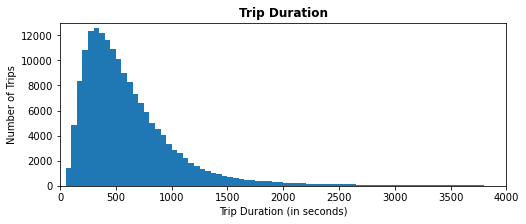

In [26]:
# plot histogram to show trip duration distribution
binsize = np.arange(0, 5000, 50)
plt.figure(figsize=[8, 3])
plt.hist(data = df_clean, x = 'duration_sec', bins = binsize)
plt.axis([0, 4000, 0, 13000])
plt.title("Trip Duration", fontweight='semibold')
plt.xlabel("Trip Duration (in seconds)")
plt.ylabel("Number of Trips")
plt.show()

In [27]:
print(round((((len(df_clean.query("duration_sec < 300")) / df_clean.shape[0]))*100)), "percent of trips are less than 5 minutes long")
print(round((((len(df_clean.query("duration_sec < 600")) / df_clean.shape[0]))*100)), "percent of trips are less than 10 minutes long")
print(round((((len(df_clean.query("duration_sec < 900")) / df_clean.shape[0]))*100)), "percent of trips are less than 15 minutes long")
print(round((((len(df_clean.query("duration_sec < 1800")) / df_clean.shape[0]))*100)), "percent of trips are less than 30 minutes long")
print("the average trip length is", round((df_clean['duration_sec']/60).mean()), "minutes long")

22 percent of trips are less than 5 minutes long
60 percent of trips are less than 10 minutes long
81 percent of trips are less than 15 minutes long
97 percent of trips are less than 30 minutes long
the average trip length is 12 minutes long


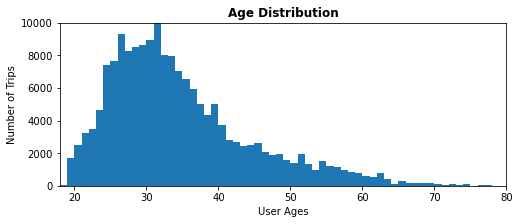

In [28]:
# plot histogram to show user age distribution
binsize = np.arange(0, 5000, 1)
plt.figure(figsize=[8, 3])
plt.hist(data = df_clean, x = 'age', bins = binsize)
plt.axis([18, 80, 0, 10000])
plt.title("Age Distribution", fontweight='semibold')
plt.xlabel("User Ages")
plt.ylabel("Number of Trips")
plt.show()

In [29]:
print(round((((len(df_clean.query("age < 40")) / df_clean.shape[0]))*100),2), "percent of users under 40 years old")
print("the user age is", round((df_clean['age']).mean(),0), "years old")
print("the minimum user age is", df_clean['age'].min())
print("the maximum user age is", df_clean['age'].max(), "- all ages over 80 were removed")

76.86 percent of users under 40 years old
the user age is 34.0 years old
the minimum user age is 18
the maximum user age is 80 - all ages over 80 were removed


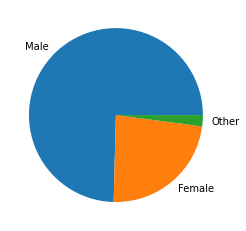

In [30]:
# plot pie chart to show user gender distribution
labels = 'Male', 'Female', 'Other'
plt.pie(df_clean.member_gender.value_counts(), labels = labels)
plt.show()

In [31]:
print(len(df_clean.query("member_gender == 'Male'")), " males account for", round((len(df_clean.query("member_gender == 'Male'")) / df_clean.shape[0]) * 100), "percent of all users")
print(len(df_clean.query("member_gender == 'Female'")), "females account for", round((len(df_clean.query("member_gender == 'Female'")) / df_clean.shape[0]) * 100), "percent of all users")
print(len(df_clean.query("member_gender == 'Other'")), "other gender account for", round((len(df_clean.query("member_gender == 'Other'")) / df_clean.shape[0]) * 100), "percent of all users")

130345  males account for 75 percent of all users
40771 females account for 23 percent of all users
3644 other gender account for 2 percent of all users


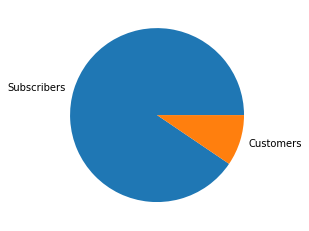

In [32]:
# plot pie chart to show user gender distribution
labels = 'Subscribers',  'Customers'
plt.pie(df_clean.user_type.value_counts(), labels = labels)
plt.show()

In [33]:
print(len(df_clean.query("user_type == 'Customer'")), " customers account for", round((len(df_clean.query("user_type == 'Customer'")) / df_clean.shape[0]) * 100), "percent of all users")
print(len(df_clean.query("user_type == 'Subscriber'")), "Subscribers account for", round((len(df_clean.query("user_type == 'Subscriber'")) / df_clean.shape[0]) * 100), "percent of all users")

16557  customers account for 9 percent of all users
158203 Subscribers account for 91 percent of all users


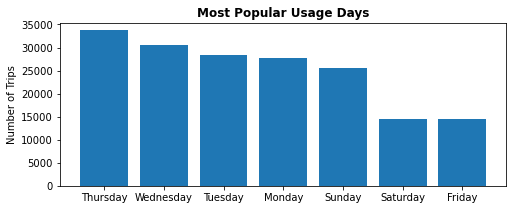

In [34]:
#create new column to display day of the week
df_clean['day']=df_clean['start_time'].dt.strftime('%A')

#create variables for bar chart
x = df_clean.day.unique()
y = df_clean.day.value_counts()

#create bar chart to show usage by day
plt.figure(figsize=[8, 3])
plt.bar(x,y)
plt.title("Most Popular Usage Days", fontweight='semibold')
plt.ylabel("Number of Trips")
plt.show()

In [35]:
print("the middle of the week, tuesday-thursday, are the busiest days.", "these days account for", round(((len(df_clean.query("day == 'Tuesday'"))+len(df_clean.query("day == 'Wednesday'"))+len(df_clean.query("day == 'Thursday'")))/df_clean.shape[0])*100), "percent of the trips")
print(round(((len(df_clean.query("day == 'Thursday'")))/df_clean.shape[0])*100), "percent of the trips are Thursday")
print(round(((len(df_clean.query("day == 'Monday'"))+len(df_clean.query("day == 'Tuesday'"))+len(df_clean.query("day == 'Wednesday'"))+len(df_clean.query("day == 'Thursday'"))+len(df_clean.query("day == 'Friday'")))/df_clean.shape[0])*100), "percent of the trips are on a weekday")
print(round(((len(df_clean.query("day == 'Saturday'"))+len(df_clean.query("day == 'Sunday'")))/df_clean.shape[0])*100), "percent of the trips are on a weekend")

the middle of the week, tuesday-thursday, are the busiest days. these days account for 53 percent of the trips
19 percent of the trips are Thursday
83 percent of the trips are on a weekday
17 percent of the trips are on a weekend


In [36]:
print('number of trips per day of the week')
df_clean.day.value_counts()

number of trips per day of the week


Thursday     33691
Tuesday      30562
Wednesday    28396
Friday       27621
Monday       25588
Sunday       14492
Saturday     14410
Name: day, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>Did not see any unusual points.  I did create new columns to make analysis easier
* Age: subtracted 2019 from member_birth_year to get user age
* Day: extracted the day of the week from the start_time column

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶
>Items cleaned
* Age: Removed any customers over 80 years old assuming these were errors
* NULLs: Removed all rows with NULL values in start_station_id, end_station_id, member_birth_year, member_gender
* Datatypes: Changed several datatypes to make data analysis easier

## Bivariate Exploration

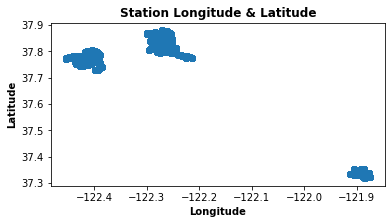

In [37]:
#scatterplot of station locations
fig = plt.figure(figsize=(6,3))
plt.scatter(data = df_clean, x = 'start_station_longitude', y = 'start_station_latitude')
plt.title('Station Longitude & Latitude', fontweight='semibold')
plt.xlabel('Longitude', fontweight='semibold')
plt.ylabel('Latitude', fontweight='semibold')

plt.show()

Here we've mapped out our station locations via longitude & latitude.  This shows three major location clusters. <br> 
The two clusters at the top-left are about 0.15 degrees apart (roughly 7-10 miles)  <br>
The clusters the bottom right is about 0.4 degrees away from the other two (roughly 30 miles away)

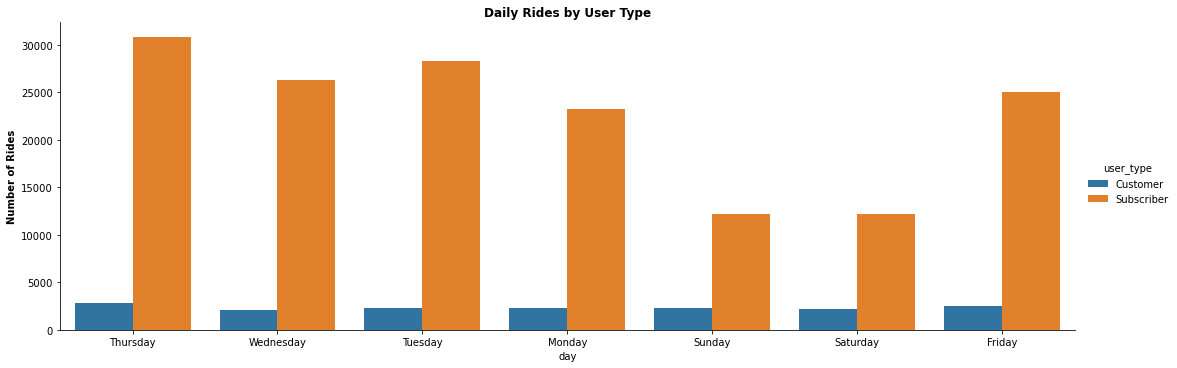

In [38]:
sns.catplot(data=df_clean, x='day', hue='user_type', kind='count', aspect=12/4)
plt.title('Daily Rides by User Type', fontweight='semibold')
plt.ylabel('Number of Rides', fontweight='semibold')

plt.show()

There are 10x more subscribers than there are customers.  <br>
We can see a definitive trend of daily riders with the subscriber group <br>
Due to the smaller size of the customer base its difficult to determine daily usage trends 

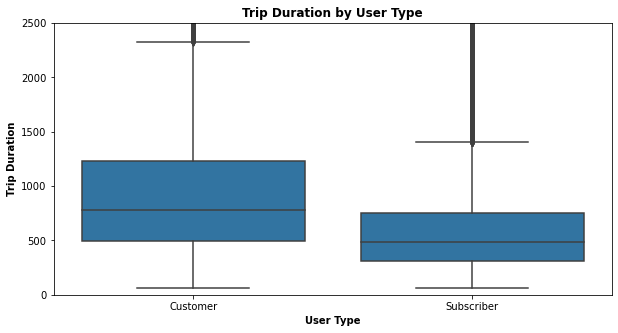

In [39]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [10, 5])
sns.boxplot(data = df_clean, x = 'user_type', y = 'duration_sec', color=base_color)
plt.ylim([0,2500])
plt.title('Trip Duration by User Type', fontweight='semibold')
plt.xlabel('User Type', fontweight='semibold')
plt.ylabel('Trip Duration', fontweight='semibold')
plt.show()

Customers clearly take longer trips than subscribers amoung all quartiles of the boxplot <br>
The biggest differences are at the upper end of the trips <br>
The average customer trip is about 200 seconds longer <br>

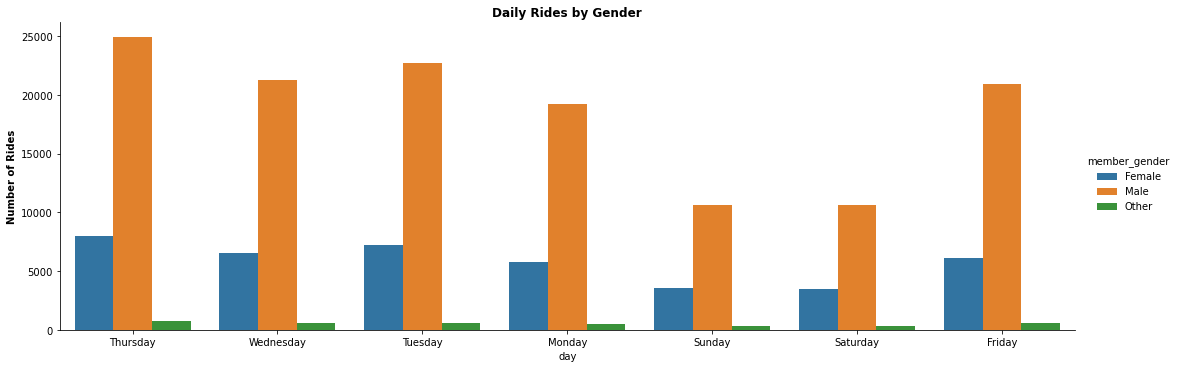

In [40]:
sns.catplot(data=df_clean, x='day', hue='member_gender', kind='count', aspect=12/4)
plt.title('Daily Rides by Gender', fontweight='semibold')
plt.ylabel('Number of Rides', fontweight='semibold')
plt.show()

Male & Female riders follow a similar daily pattern as the number of rides ebb and flow on the same days. <br>
Other gender is difficult to analyze as their overall ride numbers are so much less than males & females.  We can see a small drop on the weekends but the weekday rides appear flat

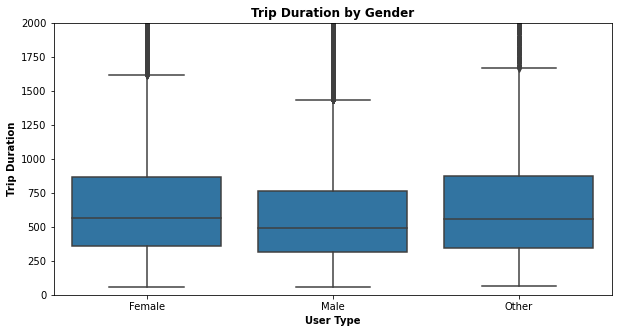

In [41]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [10, 5])
sns.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec', color=base_color)
plt.ylim([0,2000])
plt.title('Trip Duration by Gender', fontweight='semibold')
plt.xlabel('User Type', fontweight='semibold')
plt.ylabel('Trip Duration', fontweight='semibold')
plt.show()

Male riders lag behind females & other gender in duration
* Males average the shortest trips of all genders
* The longest trips by males are shorter than the longest trips of other & females


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> - **Station Locations**: Stations are physically located in three geographical clusters
> - **User Type**: Subscribers daily patterns mirror the same distributions as genders.  Customer usage seems flatter across each day.  However, customers take much longer trips than subscribers.
> - **Member Gender**: All genders seem to have similar daily ride patterns.  Males have the shortest durations compared to female and other genders. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> I was suprised to see that the weekends are the least popular days for riders.  I was expecting to see the opposite considering that overall drip durations are short (under 30 minutes) and most people run errands on the weekends. 



## Multivariate Exploration

In [42]:
# create variable for age generations

def category(age):
    if 0<age<=25:
        return 'GenZ'
    
    elif 25<age<=40:
        return 'GenY'  
    
    elif 40<age<=55:
        return 'GenX'
    
    elif 55<age<=80:
        return 'Baby Boomer'

df_clean['age_generation'] = df_clean['age'].apply(category)

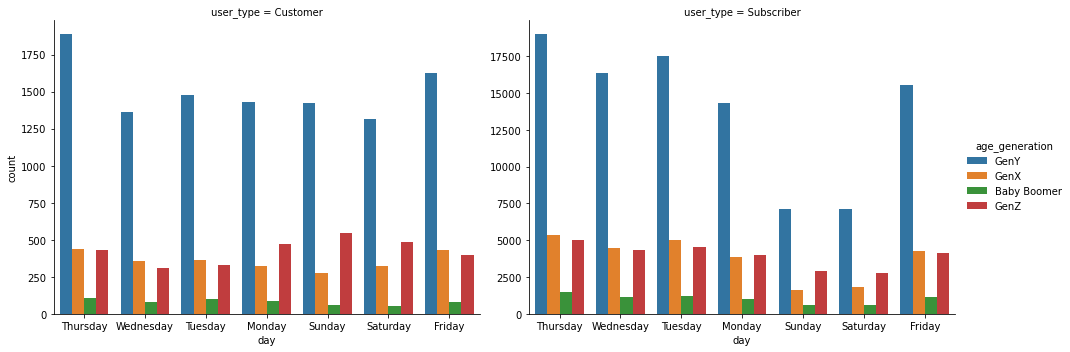

In [43]:
# daily rides per user type by age group
sns.catplot(data=df_clean, x='day', col="user_type", hue='age_generation', kind='count', aspect=20/15,
                 sharey=False)
plt.show()

Subscribers are responsible for the drop off in volume over the weekend. <br>
This could be broken down futher to see that the majority of this drop off is due to the GenY subscribers
These drops are also seen in GenX & GenZ subscribers though they dont have the same overall volume

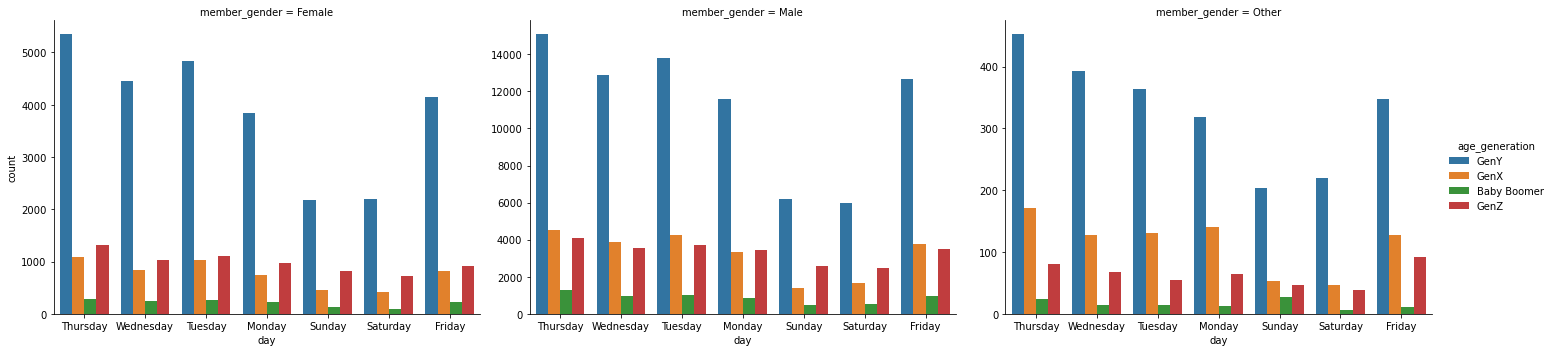

In [44]:
# daily rides per gender by age group
sns.catplot(data=df_clean, x='day', col="member_gender", hue='age_generation', kind='count', aspect=20/15,
                 sharey=False)
plt.show()

The drop off in weekend volume is consistent across all genders. <br>
There is an oddity in other gender trips on Tuesday as it does not follow the same upward trend from males & females

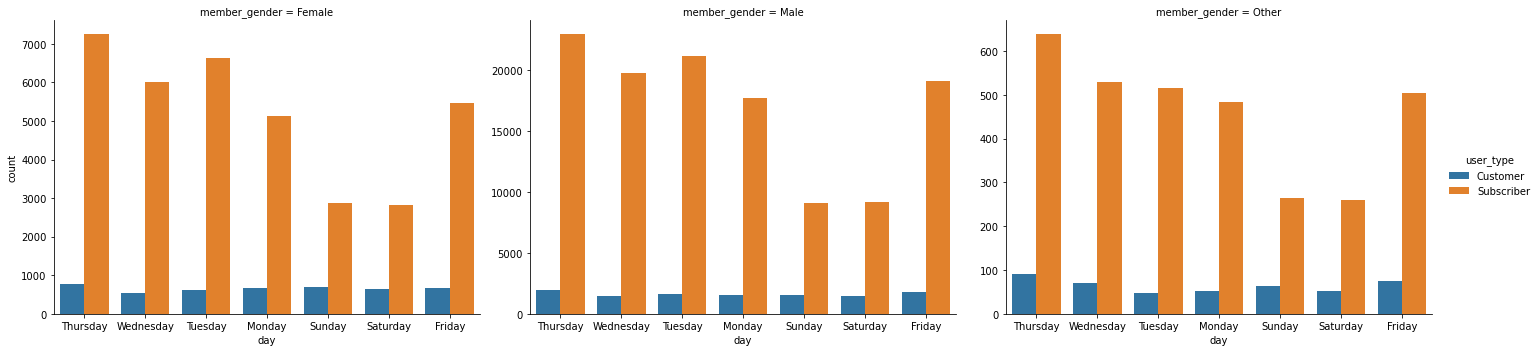

In [45]:
# daily rides per gender by user type
sns.catplot(data=df_clean, x='day', col="member_gender", hue='user_type', kind='count', aspect=20/15,
                 sharey=False)
plt.show()

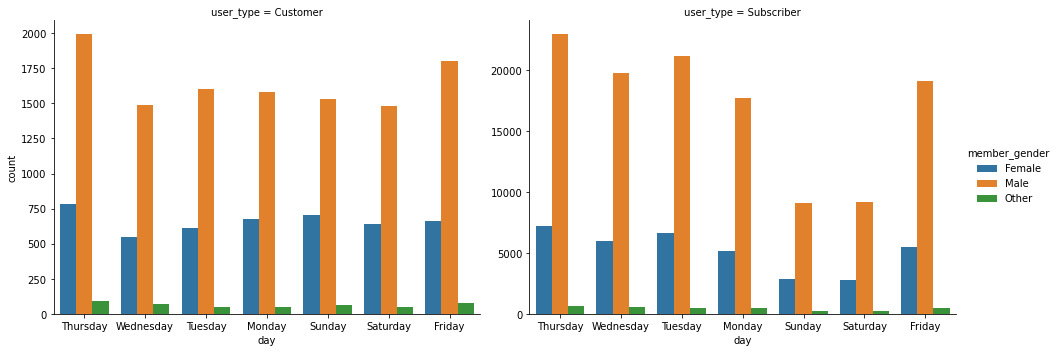

In [46]:
# daily rides per user type by gender
sns.catplot(data=df_clean, x='day', col="user_type", hue='member_gender', kind='count', aspect=20/15,
                 sharey=False)
plt.show()

Male subscribers usage drops significantly on the weekends, further than with females or other genders <br>
Male customers have less day-to day variation between saturday - wednesday then male subscribers <br>
it is still difficult to assess the usage of other gender (customers or subscribers) due to the lack of size


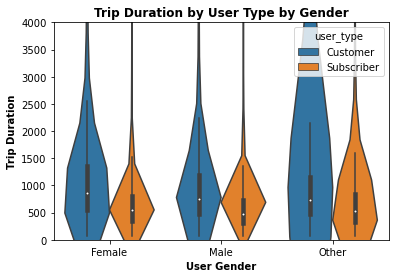

In [47]:
sns.violinplot(data = df_clean, x = 'member_gender', y = 'duration_sec', hue = 'user_type', scale="width")
plt.ylim([0,4000])
plt.title('Trip Duration by User Type by Gender', fontweight='semibold')
plt.xlabel('User Gender', fontweight='semibold')
plt.ylabel('Trip Duration', fontweight='semibold')
plt.show()

The average trip duration is higher for customers of all genders compared to subscriber durations <br>
These violin plots for the customers are longer and wider than the subscriber plots

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> **Weekend Usage**: This helped to understand which groups are responsible for weekend usage
    - GenY: this group takes by far the most trips, but their volume drastically declines on the weekends 
    - Males & Females: make up the majority of riders.  both groups decline in usage on the weekends
    - Subscribers: again, the majority of riders, sees a decline on weekends
    
### Were there any interesting or surprising interactions between features?
> I did not find any surprises in the data to note

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
    $('div.input').hide();
} else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [7]:
jupyter nbconvert SlideShow.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-7-01f34cd3f652>, line 1)